In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="23zYqWKVTLknsXYVM80E")
project = rf.workspace("iot-wqguf").project("face_baby")
version = project.version(1)
dataset = version.download("folder")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.1/74.1 kB 700.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to face_baby-1 in folder:: 100%|██████████| 96/96 [00:00<00:00, 2721.84it/s]


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

train_dir = '/content/face_baby-1/train'
valid_dir = '/content/face_baby-1/valid'
test_dir = '/content/face_baby-1/test'

image_height = 640
image_width = 640
batch_size = 32
num_classes = 4

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(image_height, image_width), batch_size=batch_size, class_mode='categorical')
valid_generator = valid_datagen.flow_from_directory(valid_dir, target_size=(image_height, image_width), batch_size=batch_size, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(image_height, image_width), batch_size=batch_size, class_mode='categorical', shuffle=False)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 10
history = model.fit(train_generator, epochs=epochs, validation_data=valid_generator)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


Found 47 images belonging to 4 classes.
Found 11 images belonging to 1 classes.
Found 25 images belonging to 4 classes.
Epoch 1/10
2/2 [==============================] - 60s 19s/step - loss: 9.1356 - accuracy: 0.3404 - val_loss: 227.8207 - val_accuracy: 0.0000e+00
Epoch 2/10
2/2 [==============================] - 60s 41s/step - loss: 7.7498 - accuracy: 0.7234 - val_loss: 31.9492 - val_accuracy: 0.0000e+00
Epoch 3/10
2/2 [==============================] - 53s 33s/step - loss: 4.6758 - accuracy: 0.1489 - val_loss: 7.3581 - val_accuracy: 0.3636
Epoch 4/10
2/2 [==============================] - 53s 18s/step - loss: 1.2033 - accuracy: 0.4681 - val_loss: 11.6075 - val_accuracy: 0.0000e+00
Epoch 5/10
2/2 [==============================] - 52s 33s/step - loss: 1.2204 - accuracy: 0.7234 - val_loss: 11.0724 - val_accuracy: 0.0000e+00
Epoch 6/10
2/2 [==============================] - 52s 34s/step - loss: 0.8771 - accuracy: 0.7234 - val_loss: 6.7879 - val_accuracy: 0.0000e+00
Epoch 7/10
2/2 [=====

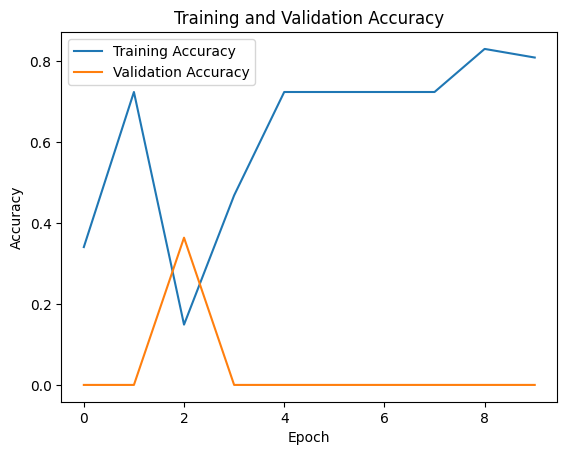

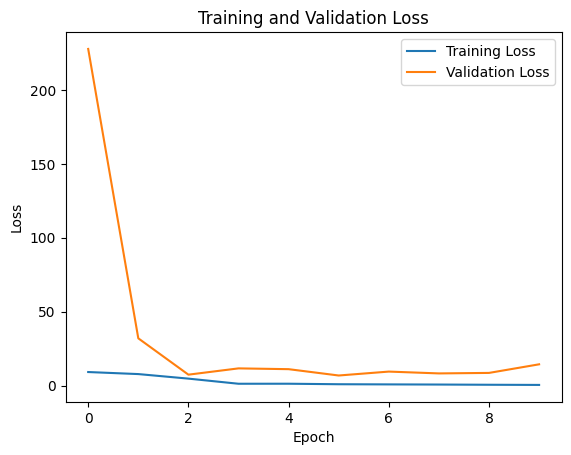

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [6]:
import numpy as np

predictions = model.predict(test_generator)

predicted_labels = np.argmax(predictions, axis=1)

true_labels = test_generator.classes

class_indices = test_generator.class_indices

class_labels = list(class_indices.keys())

true_class_names = [class_labels[i] for i in true_labels]

predicted_class_names = [class_labels[i] for i in predicted_labels]

for i in range(10):
    print(f"Image {i+1}: Predicted Class: {predicted_class_names[i]}, True Class: {true_class_names[i]}")


1/1 [==============================] - 9s 9s/step
Image 1: Predicted Class: SLEEP, True Class: CRY
Image 2: Predicted Class: SLEEP, True Class: CRY
Image 3: Predicted Class: SLEEP, True Class: CRY
Image 4: Predicted Class: SLEEP, True Class: HAPPY NORMAL
Image 5: Predicted Class: NORMAL, True Class: NORMAL
Image 6: Predicted Class: SLEEP, True Class: SLEEP
Image 7: Predicted Class: SLEEP, True Class: SLEEP
Image 8: Predicted Class: SLEEP, True Class: SLEEP
Image 9: Predicted Class: SLEEP, True Class: SLEEP
Image 10: Predicted Class: SLEEP, True Class: SLEEP


1/1 [==============================] - 0s 305ms/step


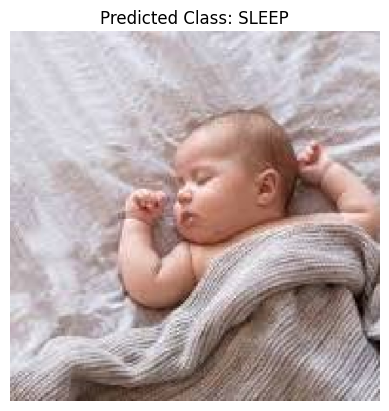

In [11]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

img_dir = '/content/download.jpg'

img = image.load_img(img_dir, target_size=(image_height, image_width))
img_array = image.img_to_array(img)
img_array = img_array / 255.0

img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)

predicted_label = np.argmax(predictions)
predicted_class = class_labels[predicted_label]

plt.imshow(img)
plt.axis('off')
plt.title(f'Predicted Class: {predicted_class}')
plt.show()
